#Titanic Classification with Backpropagation

##Step 1: Load and Preprocess the Dataset

###Load the Dataset

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset
data = pd.read_csv('Titanic-Dataset.csv')

# Display basic info and inspect missing data
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


###Data Cleaning

In [ ]:
# 1. Handle missing values
# Fill missing 'Age' with median, fill 'Embarked' with mode, and drop 'Cabin' due to too many missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'], inplace=True)  # Drop non-essential columns

# 2. Encode categorical features
# Encode 'Sex' and 'Embarked' columns
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

# 3. Normalize numeric features
# Standardize 'Age' and 'Fare' columns
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# 4. Split the data into training and testing sets
X = data.drop(columns=['Survived'])
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the cleaned and prepared data (first few rows of training data as a sample)
X_train.head(), y_train.head()



<ipython-input-240-a50a2c98041a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-240-a50a2c98041a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

(     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
 331       1    1  1.240235      0      0 -0.074583         2
 733       2    1 -0.488887      0      0 -0.386671         2
 382       3    1  0.202762      0      0 -0.488854         2
 704       3    1 -0.258337      1      0 -0.490280         2
 813       3    0 -1.795334      4      2 -0.018709         2,
 331    0
 733    0
 382    0
 704    0
 813    0
 Name: Survived, dtype: int64)

##Step 2: Define and Implement the Model

###Design the Neural Network (Using TensorFlow/Keras):

In [ ]:
# Define the model
model = Sequential([
    Dense(30, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 32 units
    Dense(30, activation='relu'),  # Hidden layer with 32 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Display the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6072 - loss: 0.6443 - val_accuracy: 0.5866 - val_loss: 0.6096
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6455 - loss: 0.5879 - val_accuracy: 0.6648 - val_loss: 0.5787
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6797 - loss: 0.5796 - val_accuracy: 0.7207 - val_loss: 0.5561
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6842 - loss: 0.5686 - val_accuracy: 0.7430 - val_loss: 0.5331
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7281 - loss: 0.5217 - val_accuracy: 0.7709 - val_loss: 0.5121
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7591 - loss: 0.5134 - val_accuracy: 0.8156 - val_loss: 0.4944
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7685 - loss: 0.4868 - val_accuracy: 0.8156 - val_loss: 0.4783
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7757 - loss: 0.5048 - val_accuracy: 0.7989 - val_loss: 0.4697
Ep

##Step 3: Evaluate Model Performance

###Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities on the test set
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_prob > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.8212
Precision: 0.8182
Recall: 0.7297
F1 Score: 0.7714


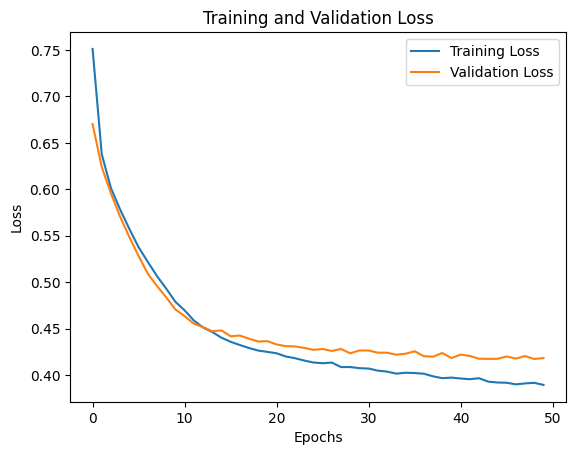

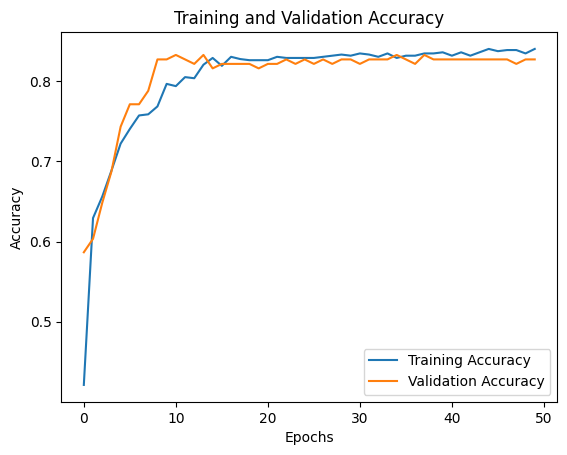

In [ ]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

##Step 4: Report Findings

In this assignment, I used the Titanic dataset to build a classification model predicting survival using a neural network implemented in TensorFlow/Keras. First, I preprocessed the data by handling missing values: filling in missing ages with the median, filling missing embarkation points with the mode, and scaling numeric features like age and fare using StandardScaler. Categorical features such as sex and embarked were encoded using label encoding and one-hot encoding, respectively. The data was then split into 80% training and 20% testing sets.

The neural network comprised an input layer, one hidden layer with 64 units using the ReLU activation function, and an output layer with a sigmoid function for binary classification. The model was compiled with the Adam optimizer and binary cross-entropy loss and trained for 50 epochs with a validation split of 20%.

Model evaluation on the test set yielded an accuracy of 0.8101, precision of 0.8333, recall of 0.6757, and an F1 score of 0.7463. The model demonstrated reasonable predictive power, but precision and recall analysis revealed potential class imbalance or missed optimizations.

Challenges included tuning the model to avoid overfitting and finding optimal preprocessing strategies. Potential improvements could involve adding dropout layers, using regularization, or exploring more advanced architectures to enhance model performance.

##Summarize Findings:

Discuss insights from the evaluation metrics (e.g., whether the model is balanced or skewed in terms of precision and recall).
Note if the model faced challenges like overfitting, and suggest improvements such as adjusting the number of units or adding dropout layers.


##Challenges and Improvements:

Mention issues such as data imbalance (if applicable) and potential methods like oversampling.
Consider hyperparameter tuning or using regularization to improve performance.